# MIS 587: Group 14 Presentation
Client: Parking and Transportation Services

### Importing all required packages

In [1]:
import gmplot
import pandas as pd
import xlrd
import IPython

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib notebook


import requests
import googlemaps
from datetime import datetime
import gmaps

import xlwt
import openpyxl

### Setting API Key

In [2]:
apikey = ''

### Loading Data 

In [3]:
emp_data = pd.read_excel('/Users/tazeenmunnavar/MIS 587: BI Project/Data/emp_85716_85719.xlsx')
emp_data.head(5)

latitudes = emp_data['Latitude']
longitudes = emp_data['Longitude']
list(emp_data.columns)

['id',
 'Street',
 'City',
 'State',
 'ZipCode',
 'BUILDING_NAME',
 'DEPT_ID',
 'DEPT_NAME',
 'Lat/Long',
 'Latitude',
 'Longitude']

# Gmplot 

In [4]:
# Load Map - lat/long here is the center of the map for now & 14 is the zoom level
gmap = gmplot.GoogleMapPlotter(32.232570, -110.951930, 14, apikey)

gmap.scatter(latitudes, longitudes, '#3B0B39', size=40, marker=False)
gmap.draw("gmplot-scatter-top9-zips_85716-85719.html")

#IPython.display.HTML(filename='gmplot-scatter-top9-zips_85716-85719.html')

In [5]:
from IPython.display import IFrame

IFrame(src='./gmplot-scatter-top9-zips_85716-85719.html', width=700, height=600)

# Kmeans Algorithm

In [6]:
emp_subset = emp_data.loc[:,['id','Latitude','Longitude']]
emp_subset.head(5)

,id,Latitude,Longitude
0,1399833,31.955892,-110.767984
1,1403543,31.955892,-110.767984
2,1388974,32.117711,-110.945735
3,1390194,32.181449,-110.964797
4,1419094,32.184732,-110.874504


In [7]:
K_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = emp_data[['Latitude']]
X_axis = emp_data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

<IPython.core.display.Javascript object>


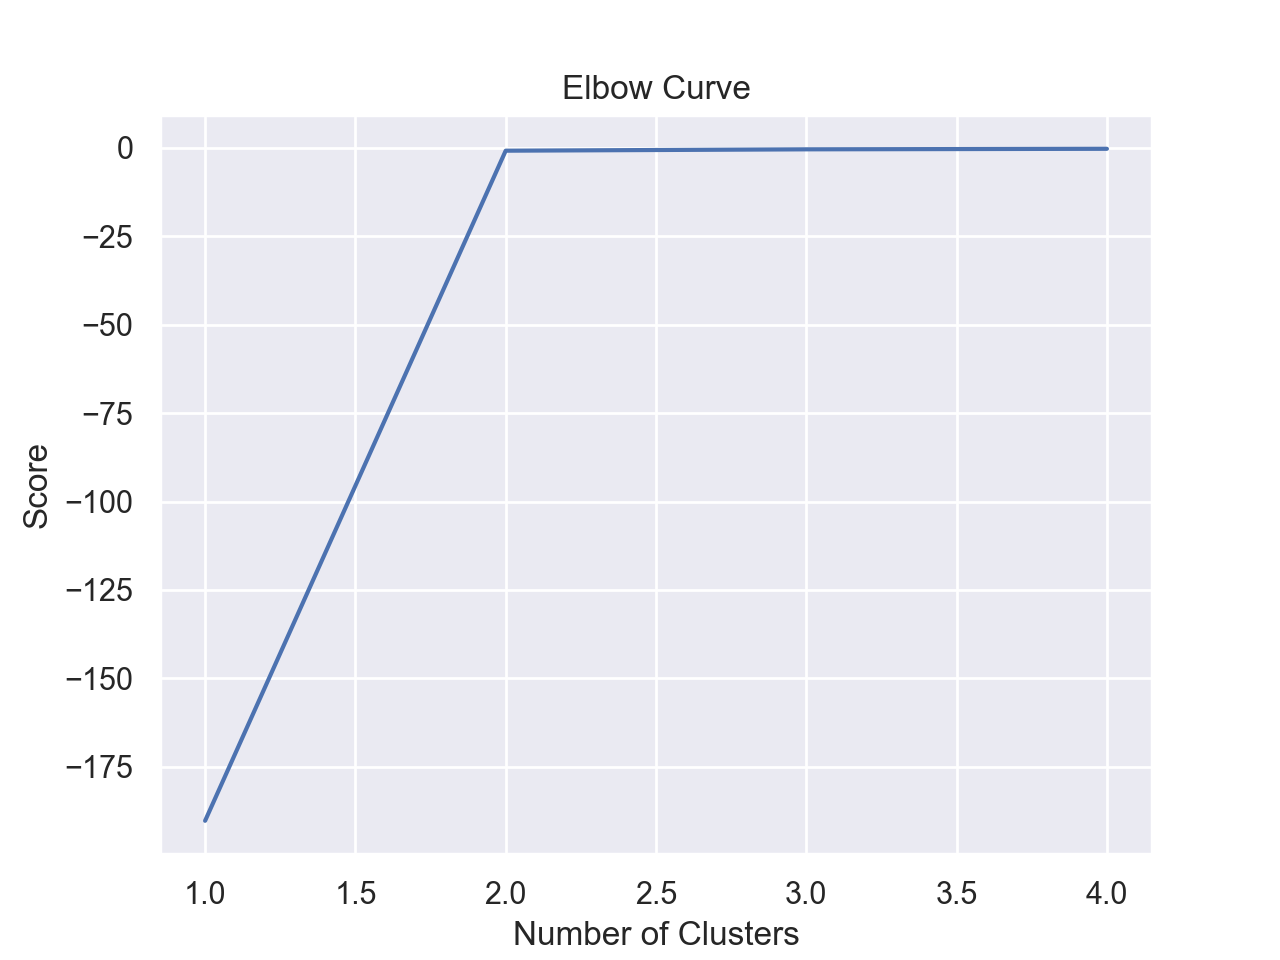

In [8]:
# Elbow Plot
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [9]:
kmeans = KMeans(n_clusters = 25, init ='k-means++')

# Compute k-means clustering. 
kmeans.fit(emp_subset[emp_subset.columns[1:3]])

emp_subset['cluster_label'] = kmeans.fit_predict(emp_subset[emp_subset.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
print('Centers: {0}'.format(centers))

# Labels of each point
labels = kmeans.predict(emp_subset[emp_subset.columns[1:3]]) 

Centers: [[  32.2520503  -110.9406193 ]
 [  39.23427     -94.724985  ]
 [  38.833654    -77.641816  ]
 [  32.22563755 -110.93066366]
 [  31.9558918  -110.7679842 ]
 [  32.24402849 -110.91296802]
 [  32.27816954 -110.95134226]
 [  32.21878881 -110.95142535]
 [  32.24001712 -110.94019341]
 [  32.25482071 -110.95532922]
 [  32.22607156 -110.87321923]
 [  32.264192   -111.082934  ]
 [  32.24176983 -110.92868727]
 [  32.27609859 -110.92845887]
 [  32.22897512 -110.95771321]
 [  32.2881541  -110.760516  ]
 [  32.25911924 -110.91378989]
 [  32.25777319 -110.92519501]
 [  32.1177112  -110.945735  ]
 [  32.22970618 -110.91803727]
 [  32.21237143 -110.93426734]
 [  32.2633012  -110.9512849 ]
 [  32.24451631 -110.95487619]
 [  32.22830823 -110.94049109]
 [  32.26543344 -110.93567119]]


<IPython.core.display.Javascript object>


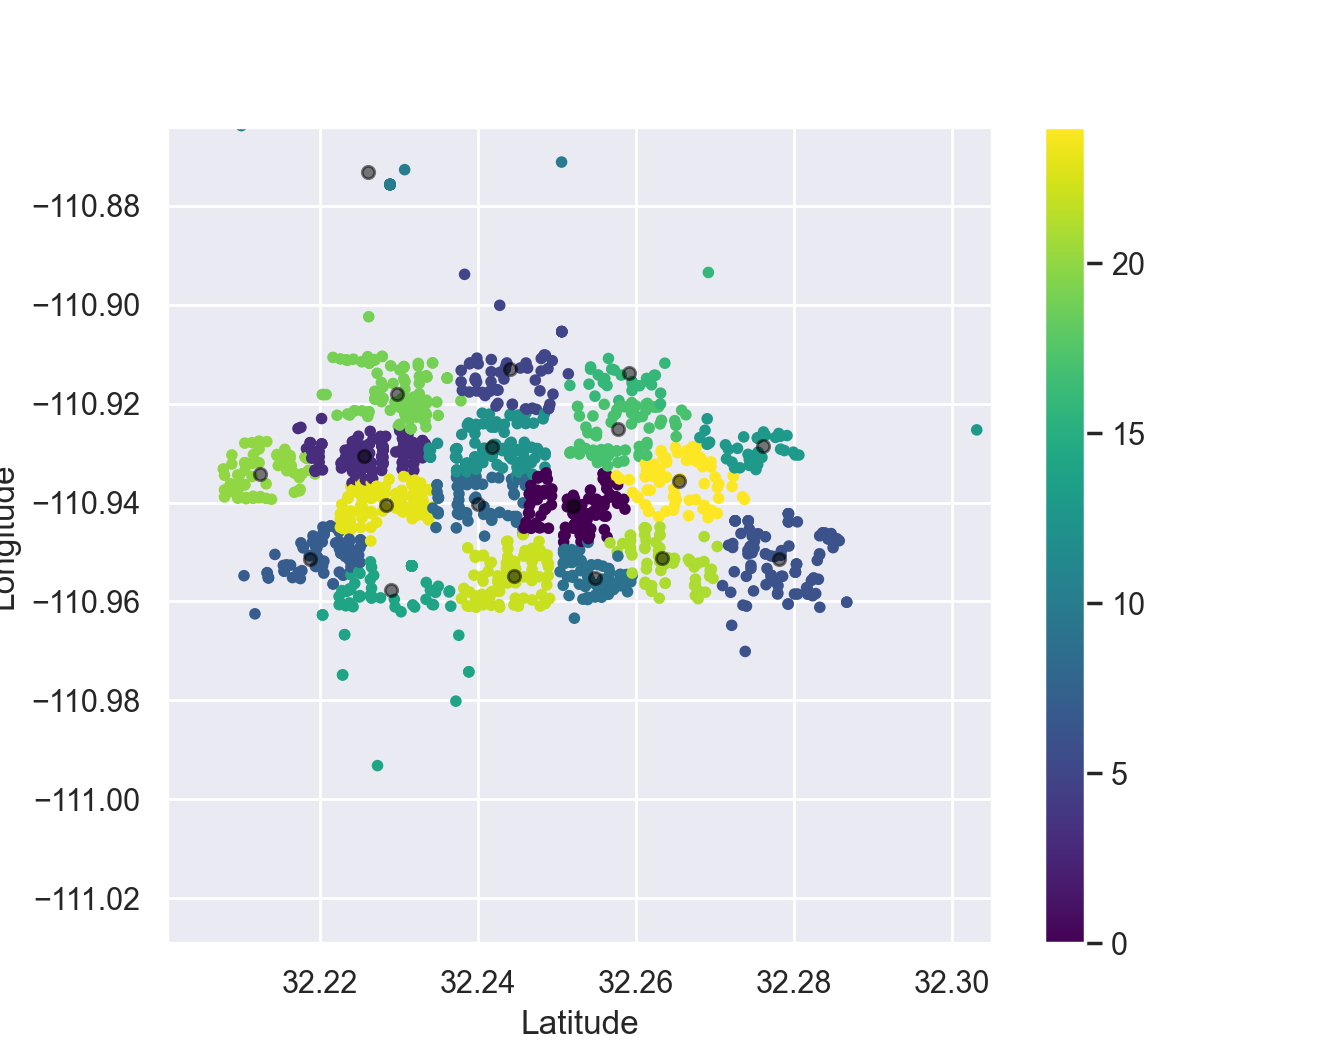

In [10]:
emp_subset.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 10, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

In [11]:
# Merging cluster label with the original data
clustered_data = emp_data.merge(emp_subset, left_on='id', right_on='id')
clustered_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,4
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,4
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735,32.117711,-110.945735,18
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797,32.181449,-110.964797,7
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504,32.184732,-110.874504,10


In [12]:
centers = kmeans.cluster_centers_.tolist()
print(centers)

[[32.25205030404851, -110.94061930306387], [39.23427, -94.724985], [38.833654, -77.641816], [32.22563755060679, -110.93066365595315], [31.9558918, -110.7679842], [32.2440284868262, -110.91296801970441], [32.27816954192434, -110.95134226243766], [32.218788812353814, -110.95142535028941], [32.24001711637047, -110.94019341450519], [32.25482071251034, -110.9553292246158], [32.2260715594584, -110.87321922675908], [32.264192, -111.082934], [32.241769827986424, -110.92868726883673], [32.276098588574285, -110.92845886589659], [32.22897511667264, -110.95771321473471], [32.2881541, -110.760516], [32.25911924488118, -110.91378988964317], [32.25777318995689, -110.92519501374119], [32.1177112, -110.945735], [32.2297061825639, -110.91803727024411], [32.21237142744456, -110.93426733787062], [32.26330120257659, -110.95128489501153], [32.244516314831436, -110.9548761872713], [32.22830822981049, -110.9404910931321], [32.26543343712778, -110.93567119131195]]


In [13]:
clusters = clustered_data['cluster_label'].value_counts() 
clusters

12    122
3     122
19    111
23    105
6     101
22    100
0      98
14     95
24     81
21     77
7      74
17     73
9      72
20     67
8      62
5      61
13     48
16     27
10     26
1       3
4       2
18      1
11      1
15      1
2       1
Name: cluster_label, dtype: int64

In [14]:
x = 20
imp_clusters = clusters[clusters < x]
imp_clusters

for i in imp_clusters.index:
    #print(i)
    clustered_data = clustered_data[clustered_data.cluster_label != i]

clusters = clustered_data['cluster_label'].value_counts() 
cluster_count = clusters.count()

In [15]:
labels = clusters.index.values.tolist()
labels

[3, 12, 19, 23, 6, 22, 0, 14, 24, 21, 7, 17, 9, 20, 8, 5, 13, 16, 10]

In [16]:
waypoints = [centers[i] for i in labels]
waypoints

[[32.22563755060679, -110.93066365595315],
 [32.241769827986424, -110.92868726883673],
 [32.2297061825639, -110.91803727024411],
 [32.22830822981049, -110.9404910931321],
 [32.27816954192434, -110.95134226243766],
 [32.244516314831436, -110.9548761872713],
 [32.25205030404851, -110.94061930306387],
 [32.22897511667264, -110.95771321473471],
 [32.26543343712778, -110.93567119131195],
 [32.26330120257659, -110.95128489501153],
 [32.218788812353814, -110.95142535028941],
 [32.25777318995689, -110.92519501374119],
 [32.25482071251034, -110.9553292246158],
 [32.21237142744456, -110.93426733787062],
 [32.24001711637047, -110.94019341450519],
 [32.2440284868262, -110.91296801970441],
 [32.276098588574285, -110.92845886589659],
 [32.25911924488118, -110.91378988964317],
 [32.2260715594584, -110.87321922675908]]

# Routes

In [17]:
origin = (32.232571,-110.951927)
#origin = tuple(map(float, origin.split(',')))

# Destination is set to Student Unions - Temporary
destination = (32.232571,-110.951927)

#top_waypoints = waypoints[0:3]
#top_waypoints

In [18]:
#gmaps.configure(api_key = apikey)
#fig = gmaps.figure()          

#layer = gmaps.directions_layer(origin, destination, waypoints = waypoints,
                               #travel_mode='DRIVING', stroke_opacity=1.0, stroke_weight=3.0)
now = datetime.now()
gmaps.configure(api_key = apikey)
fig = gmaps.figure()  
layer = gmaps.directions.Directions(origin, destination, waypoints = waypoints, optimize_waypoints=True,
                               mode='car', api_key = apikey, departue_time = now)
fig.add_layer(layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Distance and Time from Student Union through Waypoints and back

In [19]:
waypoints_list = [ item for elem in waypoints for item in elem]
waypoints_list 

str1 = '|'.join(str(e) for e in waypoints_list)
str1

waypoints_dir = str1.replace('|-', ',-')
way = waypoints_dir.split()
way

origin_dir='32.232571,-110.951927'
destination_dir = '32.232571,-110.951927'
#type(origin_dir)

In [20]:
now = datetime.now()
gmaps = googlemaps.Client(key=apikey)

for x in way:
    directions = gmaps.directions(origin = origin_dir,waypoints = x,destination = destination_dir,
                                  mode='driving',optimize_waypoints=True,departure_time = now)

In [21]:
for i in range(0, cluster_count+1):
    directions[0]['legs'][i]['distance']['text']
    directions[0]['legs'][i]['duration']['text']
    directions[0]['legs'][i]['start_address']
    directions[0]['legs'][i]['end_address']
    
df = pd.DataFrame({'Address': emp_data['Street'],
                  'Location': emp_data['Lat/Long'],
                   'Latitude': emp_data['Latitude'],
                   'Longitude': emp_data['Longitude']
                  })
df

,Address,Location,Latitude,Longitude
0,2938 E Monte Vista,"31.9558918,-110.7679842",31.955892,-110.767984
1,2551 East Monte Vista Street,"31.9558918,-110.7679842",31.955892,-110.767984
2,1221 N Plumer,"32.1177112,-110.945735",32.117711,-110.945735
3,2016 E 6th,"32.18144915,-110.96479694032043",32.181449,-110.964797
4,2929E. 10th Street,"32.1847316,-110.8745035",32.184732,-110.874504
...,...,...,...,...
1526,5900 N Misty Ridge Dr,"32.313006578084654,-110.906082906588",32.313007,-110.906083
1527,2725 E Prince,"38.833654,-77.641816",38.833654,-77.641816
1528,2550 E. Hampton,"39.23427,-94.724985",39.234270,-94.724985
1529,2356 E Hampton,"39.23427,-94.724985",39.234270,-94.724985


In [22]:
start_address = []
end_address = []
distance = []
journey_time = []

for i in range(0, cluster_count+1):
    distance.append(directions[0]['legs'][i]['distance']['text'])
    journey_time.append(directions[0]['legs'][i]['duration']['text'])
    start_address.append(directions[0]['legs'][i]['start_address'])
    end_address.append(directions[0]['legs'][i]['end_address'])

In [23]:
df_distance = pd.DataFrame({
            'start_address':start_address,
            'end_address':end_address,
            'distance':distance,
            'journey_time':journey_time},
columns = ['start_address','end_address','distance','journey_time'])

df_distance

,start_address,end_address,distance,journey_time
0,"1303 E University Blvd, Tucson, AZ 85719, USA","910 East 5th Street, Tucson, AZ 85719, USA",0.6 mi,5 mins
1,"910 East 5th Street, Tucson, AZ 85719, USA","1343 E 13th St, Tucson, AZ 85719, USA",1.2 mi,5 mins
2,"1343 E 13th St, Tucson, AZ 85719, USA","2534 E 18th St, Tucson, AZ 85716, USA",1.4 mi,5 mins
3,"2534 E 18th St, Tucson, AZ 85716, USA","5610 E 7th St, Tucson, AZ 85711, USA",4.6 mi,11 mins
4,"5610 E 7th St, Tucson, AZ 85711, USA","620 N Palo Verde Blvd, Tucson, AZ 85716, USA",2.9 mi,8 mins
5,"620 N Palo Verde Blvd, Tucson, AZ 85716, USA","2803 E 8th St, Tucson, AZ 85716, USA",1.0 mi,3 mins
6,"2803 E 8th St, Tucson, AZ 85716, USA","2115 E 6th St, Tucson, AZ 85719, USA",0.8 mi,3 mins
7,"2115 E 6th St, Tucson, AZ 85719, USA","2131 E Drachman St, Tucson, AZ 85719, USA",1.2 mi,5 mins
8,"2131 E Drachman St, Tucson, AZ 85719, USA","2937 E Lee St, Tucson, AZ 85716, USA",0.8 mi,4 mins
9,"2937 E Lee St, Tucson, AZ 85716, USA","1717 N Baxter Dr, Tucson, AZ 85716, USA",1.1 mi,4 mins


In [24]:
cluster3 = clustered_data['cluster_label'] == 5
cluster3_data = clustered_data[cluster3]
#top10 = cluster3_data.head(10)
#top10
cluster3_data
dest = waypoints[10]
dest = str(dest[0]) + ',' + str(dest[1])
dest
cluster3_data = cluster3_data['Lat/Long']
clustered_data

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797,32.181449,-110.964797,7
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504,32.184732,-110.874504,10
5,1413719,629 N Olsen,Tucson,AZ,85719,Slonaker House,9902,Office of the Provost,"32.1860067,-110.8638107",32.186007,-110.863811,32.186007,-110.863811,10
6,1414343,2638 E 21st St,Tucson,AZ,85716,Education,9523,Student and Academic Technologies,"32.207764,-110.93318683930481",32.207764,-110.933187,32.207764,-110.933187,20
7,1583493,2233 E 21st St,Tucson,AZ,85719,Leon Levy Cancer Center,6815,All of Us Research Program,"32.207926,-110.93885744279264",32.207926,-110.938857,32.207926,-110.938857,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,1771743,4356 N Rillito Creek Pl,Tucson,AZ,85719,TW Keating Bioresearch Bldg.,2328,Biomedical Engineering,"32.28574583921754,-110.9477019416084",32.285746,-110.947702,32.285746,-110.947702,6
1522,1770767,811 E Wetmore Rd,Tucson,AZ,85719,STEWARD OBS,404,Steward Observatory,"32.28669476627999,-110.96014211722841",32.286695,-110.960142,32.286695,-110.960142,6
1523,1778679,811 East Wetmore Road,Tucson,AZ,85719,Forbes,710,Cellular and Molecular Medicine,"32.28669476627999,-110.96014211722841",32.286695,-110.960142,32.286695,-110.960142,6
1525,1633509,5319 N. Via Celeste,Tucson,AZ,85719,McClelland Hall,3003,Finance,"32.303153532335806,-110.92528658770695",32.303154,-110.925287,32.303154,-110.925287,13


In [25]:
#for i in clustered_data['cluster_label']:
c = clustered_data['cluster_label'] == 5
c_data = clustered_data[c]
#print(c_data['cluster_label'])
l = labels.index(5)
#print(i, l)
dest = waypoints[l]
dest = str(dest[0]) + ',' + str(dest[1])
#c_data = c_data['Lat/Long']
c_data = c_data[c_data.cluster_label != 5]
print(c_data)

Empty DataFrame
Columns: [id, Street, City, State, ZipCode, BUILDING_NAME, DEPT_ID, DEPT_NAME, Lat/Long, Latitude_x, Longitude_x, Latitude_y, Longitude_y, cluster_label]
Index: []


In [26]:
#now = datetime.now()
gmaps = googlemaps.Client(key=apikey)

start_address = []
end_address = []
distance = []
journey_time = []

In [27]:
for i in clustered_data['cluster_label']:
    c = clustered_data['cluster_label'] == i
    c_data = clustered_data[c]
    #print(c_data['cluster_label'])
    l = labels.index(i)
    #print(i, l)
    dest = waypoints[l]
    dest = str(dest[0]) + ',' + str(dest[1])
    #c_data = c_data['Lat/Long']


    for j in c_data['Lat/Long']:
        #print(i)
        directions = gmaps.directions(origin = str(j), destination = dest,
                                      mode='walking', departure_time = datetime.now())
        for k in range(0, 1):
            directions[0]['legs'][k]['distance']['text']
            directions[0]['legs'][k]['duration']['text']
            directions[0]['legs'][k]['start_address']
            directions[0]['legs'][k]['end_address']

        #df = pd.DataFrame({'Address': top10['Street'],
                      #'Location': top10['Lat/Long'],
                       #'Latitude': top10['Latitude_x'],
                       #'Longitude': top10['Longitude_x']
                #})

        for m in range(0, 1):
            distance.append(directions[0]['legs'][m]['distance']['text'])
            journey_time.append(directions[0]['legs'][m]['duration']['text'])
            start_address.append(directions[0]['legs'][m]['start_address'])
            end_address.append(directions[0]['legs'][m]['end_address'])


    c_data = c_data[c_data.cluster_label != i]
    clustered_data = clustered_data[clustered_data.cluster_label != i]
    #print(c_data)
    
        #print(start_address)
        #print(end_address)
        #print(distance)
        #print(journey_time)

    #df = df.assign(start_address = start_address.values)
    #df['startAddress'] = start_address.values  

df_distance = pd.DataFrame({ 'start_address':start_address,'end_address':end_address,'distance':distance,'journey_time':journey_time},
columns = ['start_address','end_address','distance','journey_time'])

In [28]:
df_distance

,start_address,end_address,distance,journey_time
0,"3601 S 6th Ave, Tucson, AZ 85723, USA","1343 E 13th St, Tucson, AZ 85719, USA",4.2 mi,1 hour 24 mins
1,"910 S Fremont Ave, Tucson, AZ 85719, USA","1343 E 13th St, Tucson, AZ 85719, USA",1.4 mi,27 mins
2,"802 S 2nd Ave, Tucson, AZ 85701, USA","1343 E 13th St, Tucson, AZ 85719, USA",1.5 mi,30 mins
3,"1020 E 17th St, Tucson, AZ 85719, USA","1343 E 13th St, Tucson, AZ 85719, USA",1.4 mi,27 mins
4,"1030 E 17th St, Tucson, AZ 85719, USA","1343 E 13th St, Tucson, AZ 85719, USA",1.4 mi,27 mins
...,...,...,...,...
1517,"1441 E Prospect Ln, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.7 mi,14 mins
1518,"4307 N Rillito Creek Pl, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.0 mi,19 mins
1519,"4274 N Rillito Creek Pl, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.0 mi,20 mins
1520,"715 E Wetmore Rd, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.2 mi,24 mins


In [53]:
df_distance.to_excel("/Users/tazeenmunnavar/MIS 587: BI Project/Data/test.xlsx",
             sheet_name='Sheet_1')  

In [76]:
df_distance['journey_time'].unique()

array(['14 mins', '13 mins', '12 mins', '10 mins', '8 mins', '11 mins',
       '17 mins', '6 mins', '24 mins', '4 mins', '5 mins', '7 mins',
       '3 mins', '9 mins', '2 mins', '1 min', '21 mins'], dtype=object)

## References
#### 1. https://github.com/JosephMagiya/Clustering-GPS-Co-ordinates--Forming-Regions./blob/master/Clustering-GPS-Co-ordinates--Forming-Regions.ipynb
#### 2. https://github.com/andrecedras/spatial-optimization/blob/master/spatial-optimization%20submission.ipynb
#### 3. https://www.linkedin.com/pulse/find-optimal-route-using-google-maps-api-andre-cedras/

In [39]:
df_distance.sort_values(by=['distance'])
#x.head(150)

,start_address,end_address,distance,journey_time
1004,"1317 E Spring St, Tucson, AZ 85719, USA","1339 E Water St, Tucson, AZ 85719, USA",0.1 mi,2 mins
195,"5th St/Craycroft, Tucson, AZ 85711, USA","626 N Craycroft Rd, Tucson, AZ 85711, USA",0.1 mi,3 mins
196,"5th St/Craycroft, Tucson, AZ 85711, USA","626 N Craycroft Rd, Tucson, AZ 85711, USA",0.1 mi,3 mins
273,"3070 E 4th St, Tucson, AZ 85716, USA","2945 East 5th Street, Tucson, AZ 85716, USA",0.1 mi,3 mins
198,"5th St/Craycroft, Tucson, AZ 85711, USA","626 N Craycroft Rd, Tucson, AZ 85711, USA",0.1 mi,3 mins
...,...,...,...,...
276,"3009 E 4th St, Tucson, AZ 85716, USA","2945 East 5th Street, Tucson, AZ 85716, USA",486 ft,2 mins
640,"822 E Lee St, Tucson, AZ 85719, USA","907 E Lee St, Tucson, AZ 85719, USA",495 ft,2 mins
753,"2803 E Lee St, Tucson, AZ 85716, USA","2805 E Lee St, Tucson, AZ 85716, USA",85 ft,1 min
1441,"3755 N Warren Ave, Tucson, AZ 85719, USA","3764 N Warren Ave, Tucson, AZ 85719, USA",95 ft,1 min
